### Importing the necessary libraries and packages

In [1]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.preprocessing import StandardScaler # data preprocessing
from sklearn.neighbors import KNeighborsClassifier # classification algorithm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, roc_auc_score # accuracy metrics
import pandas as pd # data processing
import matplotlib.pyplot as plt # data plotting

### Importing the csv file as a dataFrame

In [2]:
df=pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Now taking 2 parts from the dataset:
#### X : which contains all the data except the <b>target</b> column<br>y : which contains only the <b>target</b> column 

In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("//Independent features//")
print(X.head())
print("\n\n//Dependent feature//")
print(y.head())

//Independent features//
   age  sex  cp  trestbps  chol  fbs  ...  thalach  exang  oldpeak  slope  ca  thal
0   63    1   3       145   233    1  ...      150      0      2.3      0   0     1
1   37    1   2       130   250    0  ...      187      0      3.5      0   0     2
2   41    0   1       130   204    0  ...      172      0      1.4      2   0     2
3   56    1   1       120   236    0  ...      178      0      0.8      2   0     2
4   57    0   0       120   354    0  ...      163      1      0.6      2   0     2

[5 rows x 13 columns]


//Dependent feature//
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### Split the X and y dataframes for test and training

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

### Scaling the dataset

In [5]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# K-Nearest Neighbours

In [6]:
# K-Nearest NeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_con_matrix = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print("Confusion Matrix",'\n',knn_con_matrix,"\n")
print("Accuracy of Decision Tree Classification : ",knn_acc*100,"\n")
print("Classification Report",'\n',classification_report(y_test,knn_pred))

Confusion Matrix 
 [[44  8]
 [15 55]] 

Accuracy of Decision Tree Classification :  81.14754098360656 

Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.85      0.79        52
           1       0.87      0.79      0.83        70

    accuracy                           0.81       122
   macro avg       0.81      0.82      0.81       122
weighted avg       0.82      0.81      0.81       122



In [7]:
y_score = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

### Plotting the ROC curve

Text(0.5, 0, 'False Positive Rate')

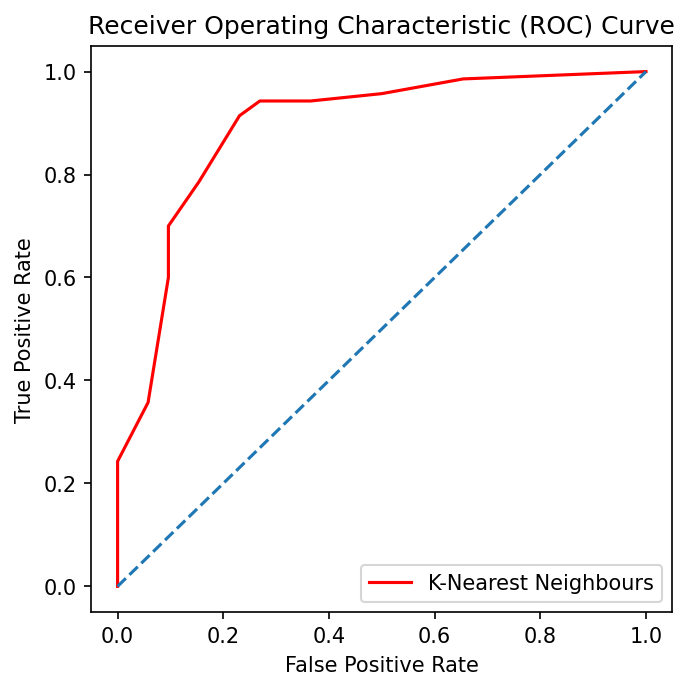

In [8]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(false_positive_rate,true_positive_rate, color='red', label = "K-Nearest Neighbours")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Computing the AUC of ROC

In [9]:
print("Area Under the Receiver Operating Characteristic Curve :",roc_auc_score(y_test,y_score))

Area Under the Receiver Operating Characteristic Curve : 0.8913461538461539
